<a href="https://colab.research.google.com/github/alinesoares138/Analise_Geografica_Mercado/blob/main/c%C3%B3digoPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/analise_expansao_regioes.xlsx')
max_value = df['Índice de Atratividade'].max()
df['Índice de Atratividade'] = (df['Índice de Atratividade'] / max_value) * 100
print(df[['Região', 'Índice de Atratividade']].head())

       Região  Índice de Atratividade
0      Centro               81.141924
1    Zona Sul               85.360953
2  Zona Norte              100.000000


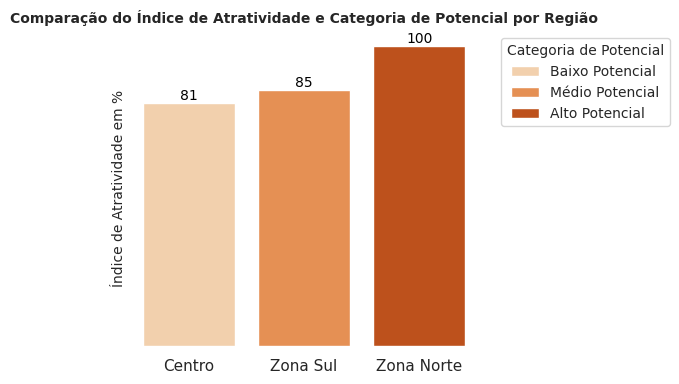

In [32]:
sns.set(style="white")

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x="Região", y="Índice de Atratividade", hue="Categoria de Potencial", data=df, palette="Oranges")
for p in bar_plot.patches:
    if p.get_height() > 0:
        bar_plot.annotate(f'{p.get_height():,.0f}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom', fontsize=10, color='black')
plt.title("Comparação do Índice de Atratividade e Categoria de Potencial por Região", fontsize=10, fontweight='bold')
plt.xlabel("", fontsize=10)
plt.ylabel("Índice de Atratividade em %", fontsize=10)
plt.grid(False)
plt.yticks([])
sns.despine(left=True, bottom=True)
plt.legend(title="Categoria de Potencial", fontsize=10, title_fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


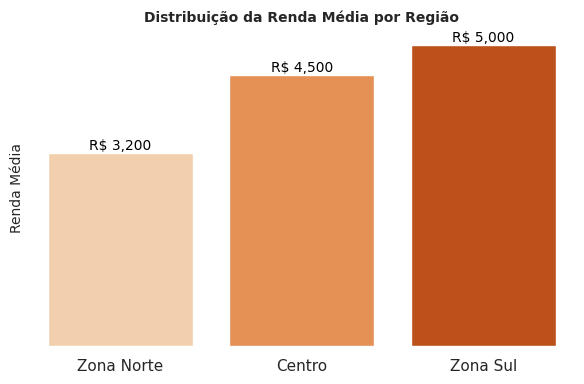

In [33]:
df_sorted = df.sort_values(by="Renda Média", ascending=True)

# Criar o gráfico para a distribuição de renda média
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x="Região", y="Renda Média", hue="Região", data=df_sorted, palette="Oranges", legend=False)
for p in bar_plot.patches:
    if p.get_height() > 0:
        bar_plot.annotate(f'R$ {p.get_height():,.0f}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom', fontsize=10, color='black')
plt.title("Distribuição da Renda Média por Região", fontsize=10, fontweight='bold')
plt.xlabel("", fontsize=10)
plt.ylabel("Renda Média", fontsize=10)
plt.grid(False)
plt.yticks([])
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

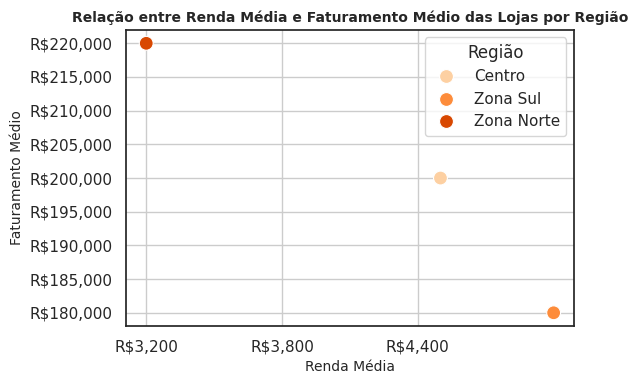

In [51]:
# Criar o gráfico de dispersão
plt.figure(figsize=(6,4))
sns.scatterplot(x="Renda Média", y="Faturamento Médio", data=df, hue="Região", palette="Oranges", s=100)

plt.title("Relação entre Renda Média e Faturamento Médio das Lojas por Região", fontsize=10, fontweight='bold')
plt.xlabel("Renda Média", fontsize=10)
plt.ylabel("Faturamento Médio", fontsize=10)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'R${y:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x:,.0f}'))
plt.xticks(range(int(df['Renda Média'].min()), int(df['Renda Média'].max()), 600))

plt.tight_layout()

# Mostrar o gráfico
plt.show()